<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment3/blob/master/semma/SEMMA_CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sample

We wish to be able to determine if a patient is likely to  have coronary artery disease, so that we can order more throught tests to properly diagnose the patient. Medical tests can be invasive and costly so we want to minimize the amount of tests ordered, however we do not want to let a patient go undiagnosed.

In this step, we select a data set that can help us achieve this goal.

We selected out dataset from Kaggle. The data set we found included information about a patients demographics, symptoms as well as medical test results. Because the purpose of the model we wish to train is to identify if a test is required, I dropped the columns of data that represented test results as we would not have access to that data when determining if a test is advisable.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets/
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CAD.csv
 CarPrice_Assignment.csv
 CoronaryArteryDisease.csv
 creditcard.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 machine-failure/
 Mine_Dataset.csv
 my_first_pipeline.pkl
 ny-traffic.csv
'Out-of-Sample Forecast Plot.html'
 secondhand-car-price-regression.csv
 water_potability.csv


In [2]:
import pandas as pd

# Load the dataset
cad_data = pd.read_csv('CoronaryArteryDisease.csv')

# Display the first few rows and get a summary of the dataset
cad_data_head = cad_data.head()
cad_data_shape = cad_data.shape

cad_data_head, cad_data_shape

(   Age  Weight  Length    Sex        BMI  DM  HTN  Current Smoker  EX-Smoker  \
 0   53      90     175   Male  29.387755   0    1               1          0   
 1   67      70     157  Fmale  28.398718   0    1               0          0   
 2   54      54     164   Male  20.077335   0    0               1          0   
 3   66      67     158  Fmale  26.838648   0    1               0          0   
 4   50      87     153  Fmale  37.165193   0    1               0          0   
 
    FH  ... Systolic Murmur Diastolic Murmur Typical Chest Pain Dyspnea  \
 0   0  ...               N                N                  0       N   
 1   0  ...               N                N                  1       N   
 2   0  ...               N                N                  1       N   
 3   0  ...               N                Y                  0       Y   
 4   0  ...               Y                N                  0       Y   
 
   Function Class Atypical Nonanginal  Exertional CP  LowTH 

We've loaded the dataset and it consists of 303 rows and 32 columns. Given the dataset's size, it is manageable, and we don't need to sample a smaller subset.

**Dataset Overview**:

* The dataset has columns such as Age, Weight, Length, Sex, BMI, and several others that likely represent symptoms and risk factors.
* The target variable seems to be the Cath column, which indicates whether a patient has coronary artery disease ("Cad") or is normal.

# Explore

In this phase, we will delve deeper into the dataset to better understand its characteristics and distributions. To do so we will get a summary of the dataset's statistics, check for missing values, and visualize distributions of key variables.

**Summary Statistics**


---



In [3]:
# Summary statistics for the numerical columns
cad_data_summary = cad_data.describe()
cad_data_summary

,Age,Weight,Length,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,BP,PR,Edema,Typical Chest Pain,Function Class
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,58.897690,73.831683,164.716172,27.248339,0.297030,0.590759,0.207921,0.033003,0.158416,129.554455,75.141914,0.039604,0.541254,0.663366
std,10.392278,11.987358,9.327661,4.098865,0.457706,0.492507,0.406491,0.178941,0.365734,18.938105,8.911801,0.195350,0.499120,1.032042
min,30.000000,48.000000,140.000000,18.115413,0.000000,0.000000,0.000000,0.000000,0.000000,90.000000,50.000000,0.000000,0.000000,0.000000
25%,51.000000,65.000000,158.000000,24.514380,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,0.000000,0.000000,0.000000
50%,58.000000,74.000000,165.000000,26.775510,0.000000,1.000000,0.000000,0.000000,0.000000,130.000000,70.000000,0.000000,1.000000,0.000000
75%,66.000000,81.000000,171.000000,29.411765,1.000000,1.000000,0.000000,0.000000,0.000000,140.000000,80.000000,0.000000,1.000000,2.000000
max,86.000000,120.000000,188.000000,40.900658,1.000000,1.000000,1.000000,1.000000,1.000000,190.000000,110.000000,1.000000,1.000000,3.000000


  * Age: The patients' ages range from 30 to 86 years, with an average age of approximately 58.9 years.
  * Weight: The weights of the patients range from 48 to 120 kg, with an average weight of roughly 73.8 kg.
  * Length (Height): The heights of the patients range from 140 to 188 cm, with an average height of about 164.7 cm.
  * BMI: The Body Mass Index (BMI) values range from 18.1 to 40.9, with an average BMI of around 27.2.
  * DM (Diabetes Mellitus): This is a binary variable (0 or 1) indicating the presence of diabetes. About 29.7% of the patients have diabetes.
  * HTN (Hypertension): This is also a binary variable. About 59.1% of the patients have hypertension.
  * Current Smoker: 20.8% of the patients are current smokers.
  * EX-Smoker: 3.3% of the patients are ex-smokers.
  * FH (Family History): 15.8% of the patients have a family history of coronary artery disease.
  * BP (Blood Pressure): The average blood pressure is approximately 129.5, with values ranging from 90 to 190.
  * PR (Pulse Rate): The pulse rates range from 50 to 110, with an average of approximately 75.1.
  * Edema: This binary variable indicates the presence of edema. Only about 3.9% of the patients have edema.
  * Typical Chest Pain: 54.1% of the patients experience typical chest pain.
  * Function Class: This seems to be an ordinal variable with values ranging from 0 to 3. Its meaning will need to be further clarified.

**Missing Values**


---



In [4]:
# Checking for missing values in each column
missing_values = cad_data.isnull().sum()

missing_values

Age                      0
Weight                   0
Length                   0
Sex                      0
BMI                      0
DM                       0
HTN                      0
Current Smoker           0
EX-Smoker                0
FH                       0
Obesity                  0
CRF                      0
CVA                      0
Airway disease           0
Thyroid Disease          0
CHF                      0
DLP                      0
BP                       0
PR                       0
Edema                    0
Weak Peripheral Pulse    0
Lung rales               0
Systolic Murmur          0
Diastolic Murmur         0
Typical Chest Pain       0
Dyspnea                  0
Function Class           0
Atypical                 0
Nonanginal               0
Exertional CP            0
LowTH Ang                0
Cath                     0
dtype: int64

It appears that there are no missing values in any of the columns. This means we don't have to deal with imputation or other methods to address missing data at this stage.

**Visualizations**

---

**Distributon of Target Variable**

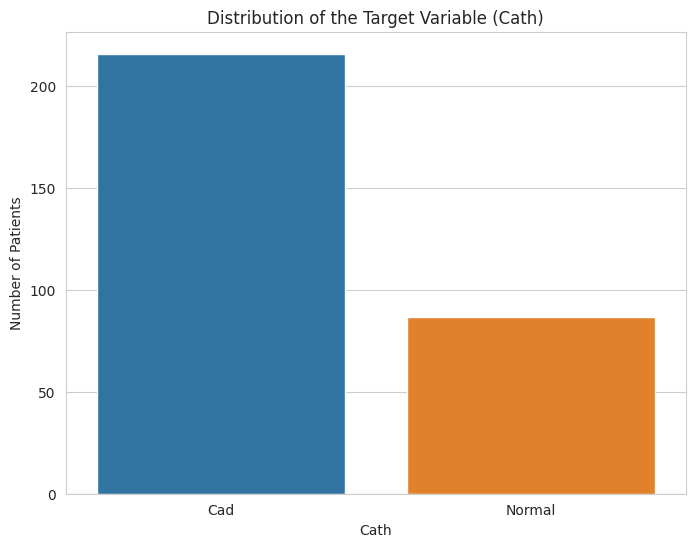

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for visualization
sns.set_style("whitegrid")

# Plotting the distribution of the target variable 'Cath'
plt.figure(figsize=(8, 6))
sns.countplot(x='Cath', data=cad_data)
plt.title("Distribution of the Target Variable (Cath)")
plt.xlabel("Cath")
plt.ylabel("Number of Patients")
plt.show()

From the plot, we can observe the distribution of the target variable, Cath. There are two categories: Cad (indicating coronary artery disease) and Normal. The dataset seems fairly imbalanced between the two categories.

**Distribution of Continuous Variables**

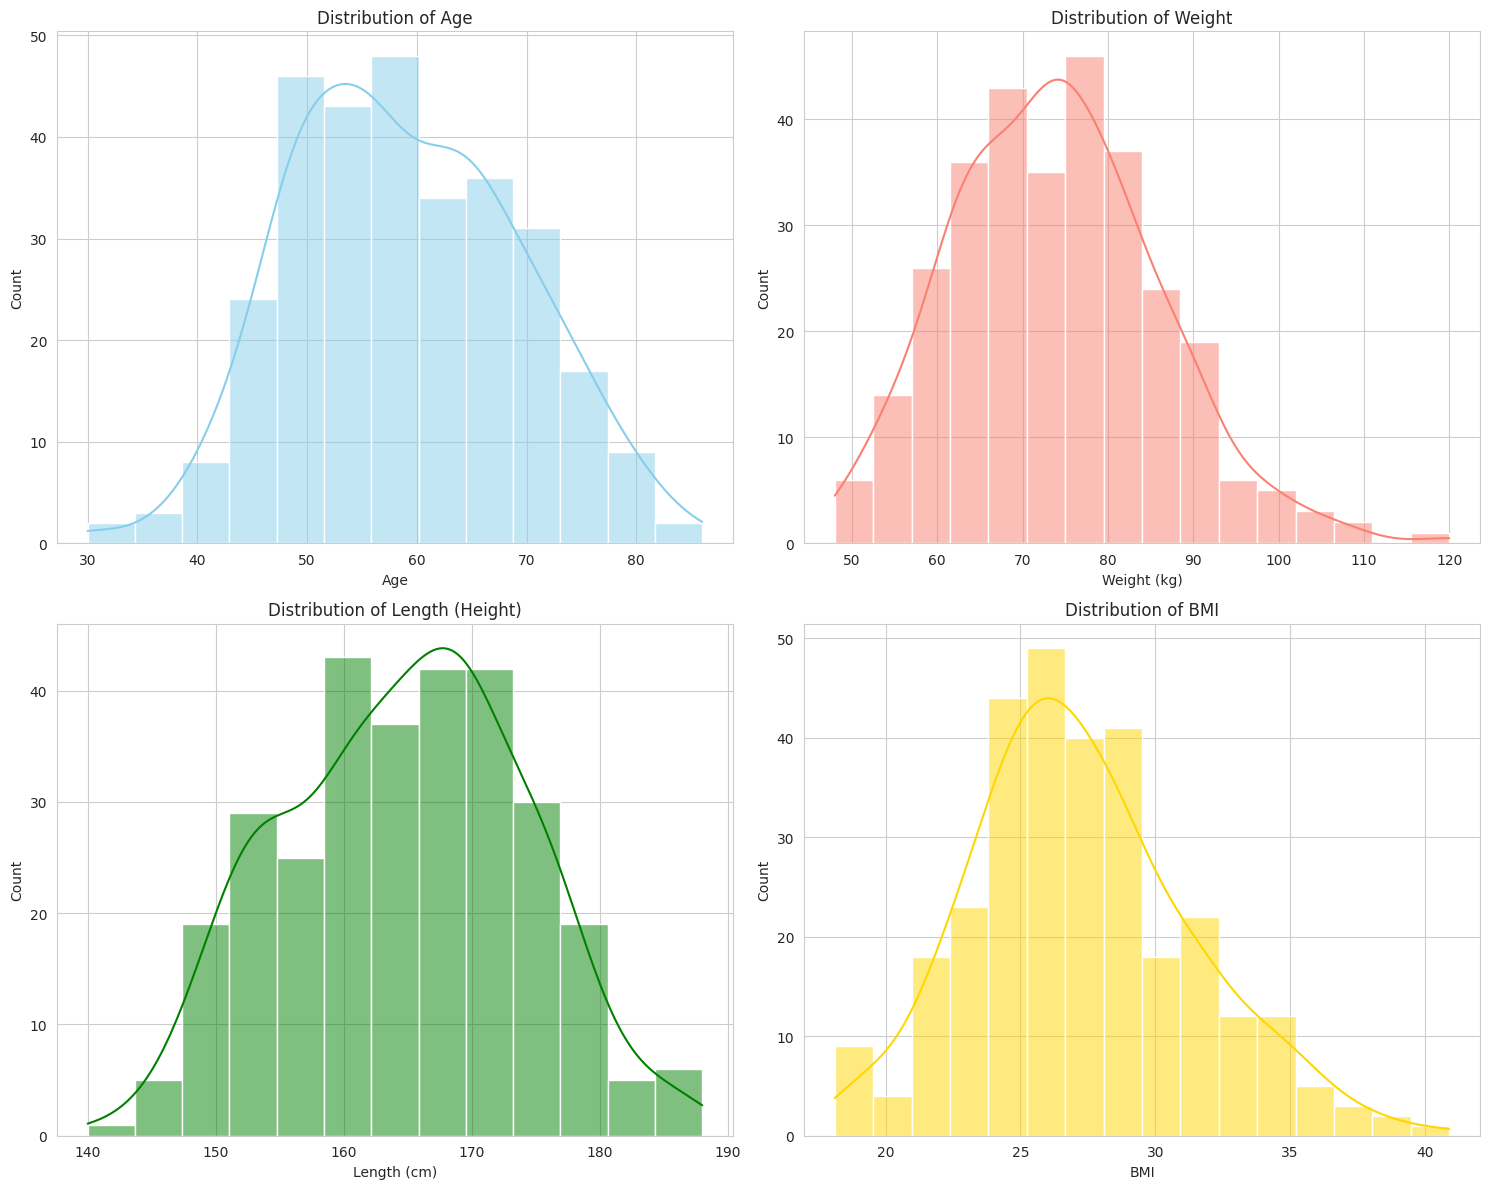

In [6]:
# Plotting the distributions of continuous variables: Age, Weight, Length, and BMI

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Age distribution
sns.histplot(cad_data['Age'], kde=True, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Distribution of Age')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Weight distribution
sns.histplot(cad_data['Weight'], kde=True, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Distribution of Weight')
axes[0, 1].set_xlabel('Weight (kg)')
axes[0, 1].set_ylabel('Count')

# Length (Height) distribution
sns.histplot(cad_data['Length'], kde=True, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Distribution of Length (Height)')
axes[1, 0].set_xlabel('Length (cm)')
axes[1, 0].set_ylabel('Count')

# BMI distribution
sns.histplot(cad_data['BMI'], kde=True, ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Distribution of BMI')
axes[1, 1].set_xlabel('BMI')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

  * Distribution of Age: Most of the patients are aged between 50 and 70 years.
  * Distribution of Weight: The weights of the patients seem to be fairly normally distributed, with a slight right skew. Most patients weigh between 60 and 90 kg.
  * Distribution of Length (Height): The majority of patients have a height between 155 cm and 175 cm.
  * Distribution of BMI: The Body Mass Index (BMI) distribution is slightly right-skewed, with most patients having a BMI between 23 and 30.

**Distribution of Categorical Variables**



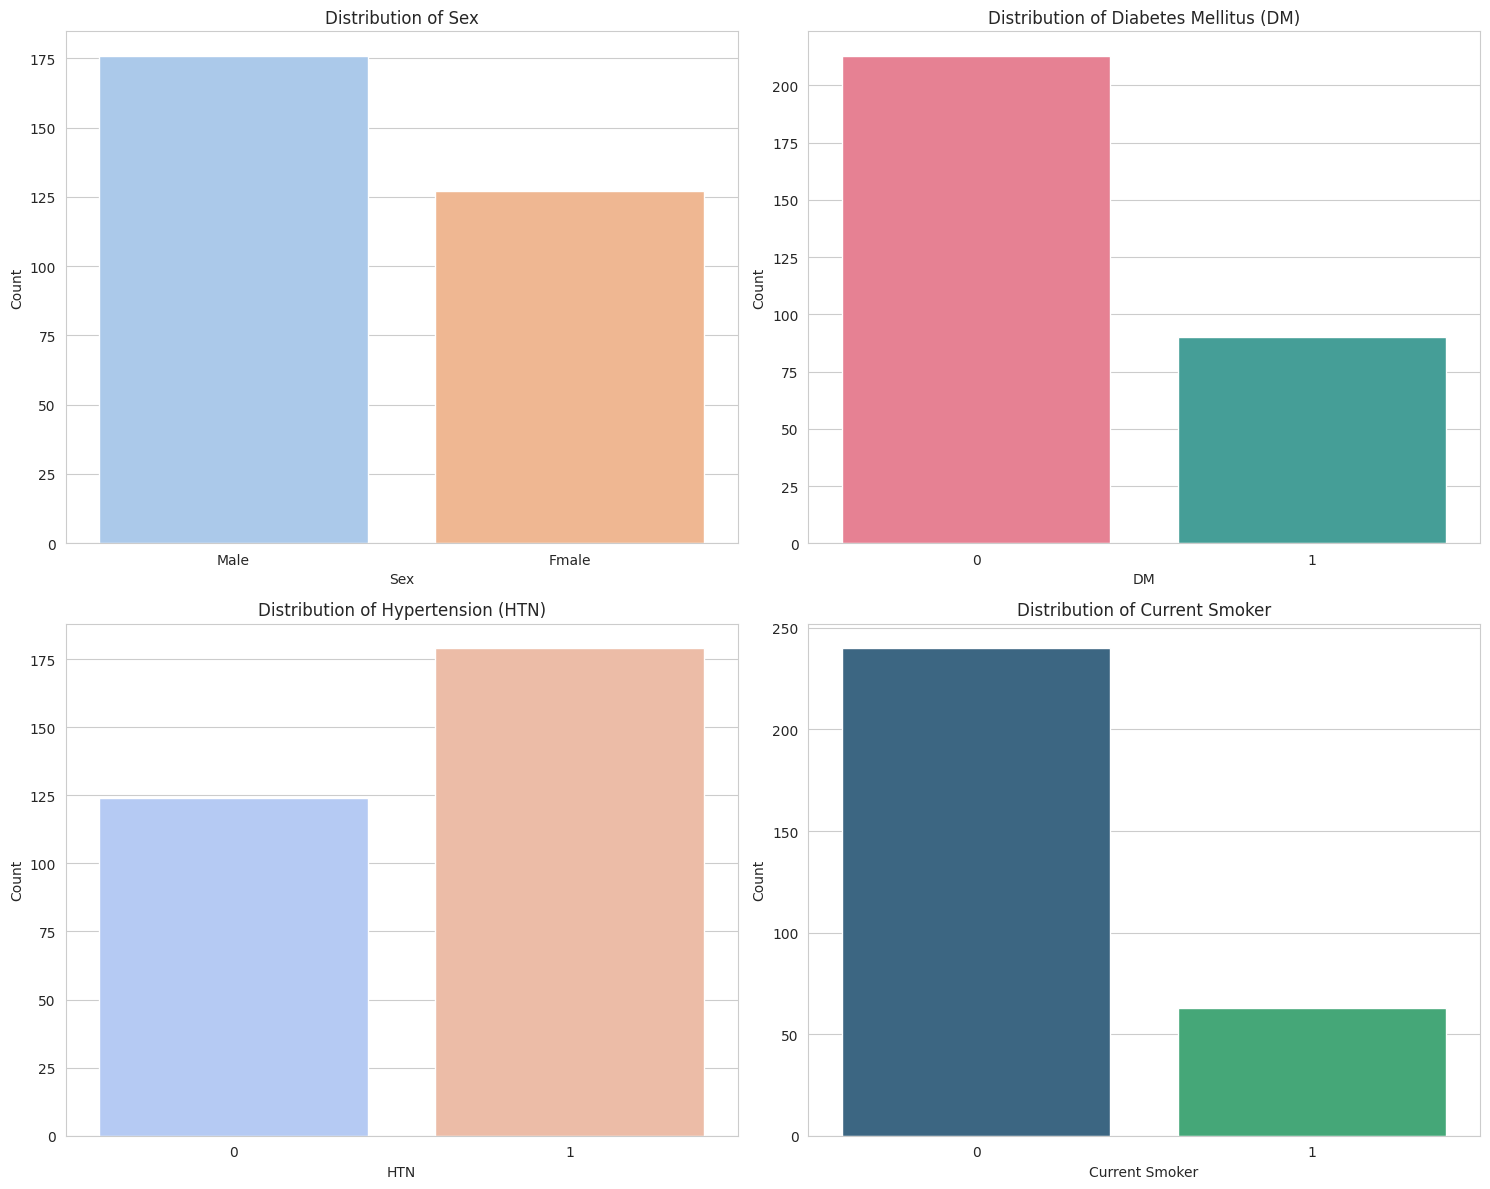

In [7]:
# Plotting the distributions of key categorical variables: Sex, DM, HTN, and Current Smoker

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 12))

# Sex distribution
sns.countplot(x='Sex', data=cad_data, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Distribution of Sex')
axes[0, 0].set_xlabel('Sex')
axes[0, 0].set_ylabel('Count')

# DM (Diabetes Mellitus) distribution
sns.countplot(x='DM', data=cad_data, ax=axes[0, 1], palette='husl')
axes[0, 1].set_title('Distribution of Diabetes Mellitus (DM)')
axes[0, 1].set_xlabel('DM')
axes[0, 1].set_ylabel('Count')

# HTN (Hypertension) distribution
sns.countplot(x='HTN', data=cad_data, ax=axes[1, 0], palette='coolwarm')
axes[1, 0].set_title('Distribution of Hypertension (HTN)')
axes[1, 0].set_xlabel('HTN')
axes[1, 0].set_ylabel('Count')

# Current Smoker distribution
sns.countplot(x='Current Smoker', data=cad_data, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Distribution of Current Smoker')
axes[1, 1].set_xlabel('Current Smoker')
axes[1, 1].set_ylabel('Count')

plt.tight_layout()
plt.show()

* Distribution of Sex: There are more male patients than female patients in the dataset.
* Distribution of Diabetes Mellitus (DM): A majority of the patients do not have diabetes, as indicated by the value "0". However, a considerable portion does have diabetes (value "1").
* Distribution of Hypertension (HTN): More patients in the dataset have hypertension (value "1") than those who don't.
* Distribution of Current Smoker: A majority of the patients are not current smokers, but there's still a sizable portion that smokes.

# Modify

In the Modify phase, we'll transform the data to better suit the modeling process. This includes encoding categorical variables, scaling numerical features, and handling potential outliers or anomalies. This will involve encoding categorical variables to numerical format, scaling continuous features to bring them to a similar scale, and handling potential outliers or anomalies if identified.

**Encode Categorical Variables**

In [8]:
from sklearn.preprocessing import LabelEncoder

# Initialize a label encoder
label_encoders = {}

# Identify categorical columns for encoding
categorical_cols = cad_data.select_dtypes(include=['object']).columns

# Encode categorical columns
for col in categorical_cols:
    le = LabelEncoder()
    cad_data[col] = le.fit_transform(cad_data[col])
    label_encoders[col] = le

# Display the first few rows after encoding
encoded_data_head = cad_data.head()

encoded_data_head

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,67,70,157,0,28.398718,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,54,54,164,1,20.077335,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,66,67,158,0,26.838648,0,1,0,0,0,...,0,1,0,1,3,0,1,0,0,1
4,50,87,153,0,37.165193,0,1,0,0,0,...,1,0,0,1,2,0,0,0,0,1


**Scale Continouse**

In [9]:
from sklearn.preprocessing import StandardScaler

# Identify continuous columns for scaling
continuous_cols = ['Age', 'Weight', 'Length', 'BMI', 'BP', 'PR']

# Initialize a standard scaler
scaler = StandardScaler()

# Scale continuous columns
cad_data[continuous_cols] = scaler.fit_transform(cad_data[continuous_cols])

# Display the first few rows after scaling
scaled_data_head = cad_data.head()

scaled_data_head

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,Systolic Murmur,Diastolic Murmur,Typical Chest Pain,Dyspnea,Function Class,Atypical,Nonanginal,Exertional CP,LowTH Ang,Cath
0,-0.568446,1.351012,1.104333,1,0.522817,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.780937,-0.320172,-0.828604,0,0.281122,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,-0.472061,-1.657120,-0.076906,1,-1.752404,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0.684552,-0.570850,-0.721218,0,-0.100118,0,1,0,0,0,...,0,1,0,1,3,0,1,0,0,1
4,-0.857599,1.100334,-1.258145,0,2.423417,0,1,0,0,0,...,1,0,0,1,2,0,0,0,0,1


**Check for Outliers**

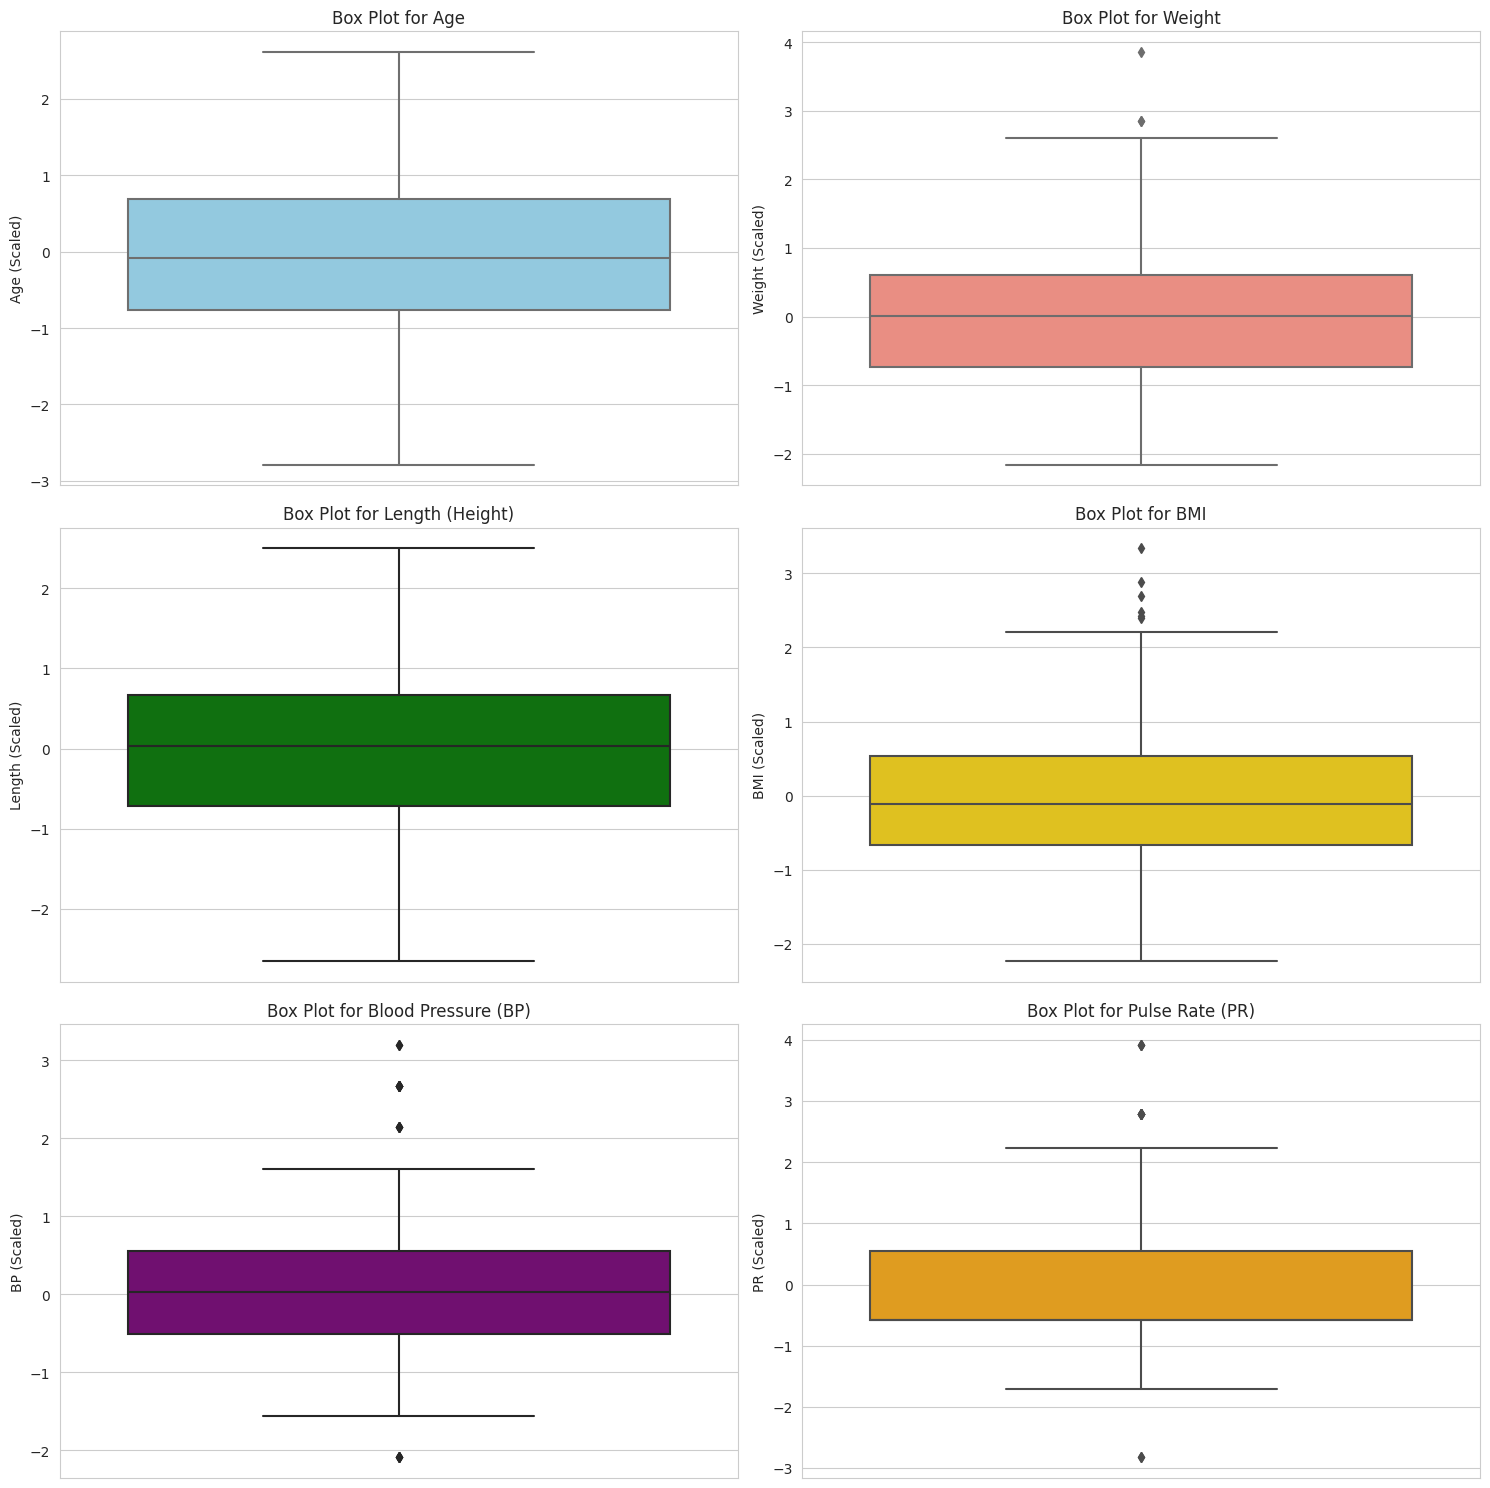

In [10]:
# Plotting box plots for continuous columns to inspect for outliers

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Box plot for Age
sns.boxplot(y=cad_data['Age'], ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Box Plot for Age')
axes[0, 0].set_ylabel('Age (Scaled)')

# Box plot for Weight
sns.boxplot(y=cad_data['Weight'], ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Box Plot for Weight')
axes[0, 1].set_ylabel('Weight (Scaled)')

# Box plot for Length (Height)
sns.boxplot(y=cad_data['Length'], ax=axes[1, 0], color='green')
axes[1, 0].set_title('Box Plot for Length (Height)')
axes[1, 0].set_ylabel('Length (Scaled)')

# Box plot for BMI
sns.boxplot(y=cad_data['BMI'], ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Box Plot for BMI')
axes[1, 1].set_ylabel('BMI (Scaled)')

# Box plot for BP
sns.boxplot(y=cad_data['BP'], ax=axes[2, 0], color='purple')
axes[2, 0].set_title('Box Plot for Blood Pressure (BP)')
axes[2, 0].set_ylabel('BP (Scaled)')

# Box plot for PR
sns.boxplot(y=cad_data['PR'], ax=axes[2, 1], color='orange')
axes[2, 1].set_title('Box Plot for Pulse Rate (PR)')
axes[2, 1].set_ylabel('PR (Scaled)')

plt.tight_layout()
plt.show()

  * Age: No significant outliers detected.
  * Weight: No significant outliers detected.
  * Length (Height): No significant outliers detected.
  * BMI: There are a few data points that are above the upper whisker, indicating potential outliers.
  * Blood Pressure (BP): Some potential outliers are present below the lower whisker.
  * Pulse Rate (PR): A few potential outliers are present above the upper whisker.

**Decision on Outliers**:
Given the medical context of the data, it's crucial to be cautious about removing outliers, as they could represent genuine cases. Instead of removing them, we might consider other methods like robust scaling or using models that are less sensitive to outliers.

# Model



In the Model phase, we'll select an appropriate classification algorithm, train an initial model, and evaluate its performance. To do this we will split the data into training and verification steps, choose a classifcation algorithm, train the model, and evaluate its performance.

**Data Spliting**

In [11]:
from sklearn.model_selection import train_test_split

# Define the features and target variable
X = cad_data.drop(columns=['Cath'])
y = cad_data['Cath']

# Split the data into training and validation sets (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the training and validation sets
train_shape, val_shape = X_train.shape, X_val.shape

train_shape, val_shape

((242, 31), (61, 31))

We've split the data into training and validation sets:

  * Training set: 242 samples
  * Validation set: 61 samples

The split was done in an 80-20 ratio, ensuring that the validation set is representative of the overall data distribution.

**Initial Model Training**

---



**Random Forest Model**

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model using the training set
rf_classifier.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_classifier.predict(X_val)

# Evaluate the model's performance
accuracy = accuracy_score(y_val, y_val_pred)
conf_matrix = confusion_matrix(y_val, y_val_pred)
class_report = classification_report(y_val, y_val_pred)

accuracy, conf_matrix, class_report

(0.819672131147541,
 array([[40,  3],
        [ 8, 10]]),
 '              precision    recall  f1-score   support\n\n           0       0.83      0.93      0.88        43\n           1       0.77      0.56      0.65        18\n\n    accuracy                           0.82        61\n   macro avg       0.80      0.74      0.76        61\nweighted avg       0.81      0.82      0.81        61\n')

Using the **Random Forest classifier**, we achieved the following results on the validation set:

  * Accuracy: Approximately 81.97%

  * Confusion Matrix:
      * True Negatives (TN): 40
      * False Positives (FP): 3
      * False Negatives (FN): 8
      * True Positives (TP): 10

  * Classification Report:

      * Precision (Class 0): 0.83

      * Recall (Class 0): 0.93

      * F1-score (Class 0): 0.88

      * Precision (Class 1): 0.77

      * Recall (Class 1): 0.56

      * F1-score (Class 1): 0.65

Given our initial requirement where false positives are preferable to false negatives (we would rather order an unnecessary test than miss a patient with the disease), it's important to focus on the False Negatives (FN) in the confusion matrix. Currently, there are 8 FN, meaning 8 patients with the disease were missed by the model. We will test other models to see if they perform better.

**Logistic Regression Model**

In [13]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model using the training set
logreg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_logreg = logreg.predict(X_val)

# Evaluate the model's performance
accuracy_logreg = accuracy_score(y_val, y_val_pred_logreg)
conf_matrix_logreg = confusion_matrix(y_val, y_val_pred_logreg)
class_report_logreg = classification_report(y_val, y_val_pred_logreg)

accuracy_logreg, conf_matrix_logreg, class_report_logreg

(0.8360655737704918,
 array([[41,  2],
        [ 8, 10]]),
 '              precision    recall  f1-score   support\n\n           0       0.84      0.95      0.89        43\n           1       0.83      0.56      0.67        18\n\n    accuracy                           0.84        61\n   macro avg       0.84      0.75      0.78        61\nweighted avg       0.84      0.84      0.83        61\n')

* Accuracy: Approximately 83.61%
* Confusion Matrix:
  * True Negatives (TN): 41
  * False Positives (FP): 2
  * False Negatives (FN): 8
  * True Positives (TP): 10
* Classification Report:
  * Precision, Recall, and F1-score for both classes are relatively balanced, with the model having a slight difficulty in detecting true positives (patients with the disease).

The Logistic Regression model provides a balanced performance with fewer false negatives compared to the default Random Forest model.

**Gradient Boosted Machines**

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting Machines (GBM) model
gbm = GradientBoostingClassifier(random_state=42)

# Train the model using the training set
gbm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred_gbm = gbm.predict(X_val)

# Evaluate the model's performance
accuracy_gbm = accuracy_score(y_val, y_val_pred_gbm)
conf_matrix_gbm = confusion_matrix(y_val, y_val_pred_gbm)
class_report_gbm = classification_report(y_val, y_val_pred_gbm)

accuracy_gbm, conf_matrix_gbm, class_report_gbm

(0.819672131147541,
 array([[39,  4],
        [ 7, 11]]),
 '              precision    recall  f1-score   support\n\n           0       0.85      0.91      0.88        43\n           1       0.73      0.61      0.67        18\n\n    accuracy                           0.82        61\n   macro avg       0.79      0.76      0.77        61\nweighted avg       0.81      0.82      0.81        61\n')

* Accuracy: Approximately 81.97%
* Confusion Matrix:
  * True Negatives (TN): 39
  * False Positives (FP): 4
  * False Negatives (FN): 7
  * True Positives (TP): 11
* Classification Report:
  * The model provides balanced precision, recall, and F1-score values for both classes. The recall for positive cases (patients with the disease) is around 61%, indicating the model's capability to detect these cases.

Both Logistic Regression and GBM models have similar accuracy scores.The GBM model has one fewer false negative compared to the Logistic Regression model, which is a slight advantage given our objective of minimizing false negatives.

# Assess

In the Assess phase, we evaluate the model's performance more deeply and consider its implications from a business perspective.

**Comparision of Models**

---

* Random Forest:
  * Accuracy: ~81.97%
  * False Negatives (FN): 8
* Logistic Regression:
  * Accuracy: ~83.61%
  * False Negatives (FN): 8
* Gradient Boosting Machines (GBM):
  * Accuracy: ~81.97%
  * False Negatives (FN): 7

**Business Implications**

---
**False Positives**: These represent patients who are incorrectly classified as having coronary artery disease. From a medical perspective, this might lead to unnecessary tests, which can be costly and cause anxiety for the patient. However, given the serious nature of the disease, it's preferable to err on the side of caution.

**False Negatives**: These are more concerning as they represent patients who have the disease but are not identified by the model. Missing such cases can have severe medical consequences.

**Deployment Considerations**


---

* If due to the relatively high rates of false negatives, if deployed in a clinical setting, the model should be used as a supplementary tool and not replace medical judgment.
* Regularly retrain the model with new data to ensure it remains accurate and relevant.
* Monitor the model's performance in the real world and gather feedback from clinicians to understand its strengths and weaknesses.





**Conclusion**

Given the data and models we've explored, the GBM model offers the lowest number of false negatives. Still, it's essential to consider both the statistical performance and the clinical context when making decisions. The model can be a valuable tool for screening patients, but medical professionals should have the final say in diagnostic decisions.